In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('loan/loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

### Check Null Value Columns

In [5]:
null_values = df.isna().sum()
null_values

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Delete Columns having more than 85% null values 

In [6]:
complete_null = []
c = 0
for index, val in null_values.iteritems():
    c += 1
    print(index, val, (val/39717)*100)
    print(c)
    if (val/39717) >= 0.85:
        complete_null.append(index)

id 0 0.0
1
member_id 0 0.0
2
loan_amnt 0 0.0
3
funded_amnt 0 0.0
4
funded_amnt_inv 0 0.0
5
term 0 0.0
6
int_rate 0 0.0
7
installment 0 0.0
8
grade 0 0.0
9
sub_grade 0 0.0
10
emp_title 2459 6.191303472064859
11
emp_length 1075 2.7066495455346575
12
home_ownership 0 0.0
13
annual_inc 0 0.0
14
verification_status 0 0.0
15
issue_d 0 0.0
16
loan_status 0 0.0
17
pymnt_plan 0 0.0
18
url 0 0.0
19
desc 12940 32.58050708764509
20
purpose 0 0.0
21
title 11 0.027695948838029054
22
zip_code 0 0.0
23
addr_state 0 0.0
24
dti 0 0.0
25
delinq_2yrs 0 0.0
26
earliest_cr_line 0 0.0
27
inq_last_6mths 0 0.0
28
mths_since_last_delinq 25682 64.66248709620565
29
mths_since_last_record 36931 92.98537150338646
30
open_acc 0 0.0
31
pub_rec 0 0.0
32
revol_bal 0 0.0
33
revol_util 50 0.12589067653649572
34
total_acc 0 0.0
35
initial_list_status 0 0.0
36
out_prncp 0 0.0
37
out_prncp_inv 0 0.0
38
total_pymnt 0 0.0
39
total_pymnt_inv 0 0.0
40
total_rec_prncp 0 0.0
41
total_rec_int 0 0.0
42
total_rec_late_fee 0 0.0
43
r

In [7]:
df.drop(columns=complete_null, inplace=True)

In [8]:
df.shape

(39717, 55)

### Removing Unecessary Columns

In [9]:
columns=['id', 'member_id','pymnt_plan', 'url', 'zip_code', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_title', 'desc', 'title', 'mths_since_last_delinq']
df.loc[:, columns].head()

,id,member_id,pymnt_plan,url,zip_code,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_title,desc,title,mths_since_last_delinq
0,1077501,1296599,n,https://lendingclub.com/browse/loanDetail.acti...,860xx,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,NaN,Borrower added on 12/22/11 > I need to upgra...,Computer,NaN
1,1077430,1314167,n,https://lendingclub.com/browse/loanDetail.acti...,309xx,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,Ryder,Borrower added on 12/22/11 > I plan to use t...,bike,NaN
2,1077175,1313524,n,https://lendingclub.com/browse/loanDetail.acti...,606xx,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,NaN,NaN,real estate business,NaN
3,1076863,1277178,n,https://lendingclub.com/browse/loanDetail.acti...,917xx,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,AIR RESOURCES BOARD,Borrower added on 12/21/11 > to pay for prop...,personel,35.0
4,1075358,1311748,n,https://lendingclub.com/browse/loanDetail.acti...,972xx,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,University Medical Group,Borrower added on 12/21/11 > I plan on combi...,Personal,38.0


In [10]:
df.drop(columns=columns, inplace=True)

In [11]:
df.shape

(39717, 38)

In [12]:
df.iloc[:,:].head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Remove current customers as they are neither default nor non default

In [13]:
df = df[df['loan_status'] != 'Current'].iloc[:, :]

### Null value, Data Type and Cleaning

In [14]:
df.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

#### Drop the null values for emp_length as there are only few records

In [15]:
df = df[df['emp_length'].notna()]

In [16]:
df.isna().sum()

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  47
total_acc                    0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_rec_int                0
total_rec_late_fee           0
recoveri

In [17]:
#Putting 0 if no bankrups filed and value is missing
df['pub_rec_bankruptcies'].fillna(0, inplace=True)

In [18]:
#We can't drop the records which are null in last_pymnt_d field as these are the default customers. 
#So we will fill these null values with issue date considering they have not paid from the beginning.
df[df['last_pymnt_d'].isna()]['loan_status'].value_counts()

Charged Off    66
Name: loan_status, dtype: int64

In [19]:
def replace_last_payment_dt_null(x):
    if pd.isna(x['last_pymnt_d']):
        x['last_pymnt_d'] = x['issue_d']
    return x

df = df.apply(replace_last_payment_dt_null, axis=1) 

In [20]:
df[df['revol_util'].isna()]['loan_status'].value_counts()

Fully Paid     32
Charged Off    15
Name: loan_status, dtype: int64

In [21]:
#Let's replace revol_util null values with 0 considering 0 utilization 
df['revol_util'].fillna('0%', inplace=True)

In [22]:
#Let's delete those 2 records with last pull date null
df = df[df['last_credit_pull_d'].notna()]

In [23]:
df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d  

In [24]:
df.shape

(37542, 38)

#### Dtype and format check

In [25]:
df.iloc[:, 9:].head()

,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37542 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37542 non-null  int64  
 1   funded_amnt              37542 non-null  int64  
 2   funded_amnt_inv          37542 non-null  float64
 3   term                     37542 non-null  object 
 4   int_rate                 37542 non-null  object 
 5   installment              37542 non-null  float64
 6   grade                    37542 non-null  object 
 7   sub_grade                37542 non-null  object 
 8   emp_length               37542 non-null  object 
 9   home_ownership           37542 non-null  object 
 10  annual_inc               37542 non-null  float64
 11  verification_status      37542 non-null  object 
 12  issue_d                  37542 non-null  object 
 13  loan_status              37542 non-null  object 
 14  purpose               

In [27]:
#Fix interest rate
df['int_rate'] = df['int_rate'].apply(lambda x:float(x.rstrip('%')))

In [28]:
#Fix interest rate
df['issue_d'] = pd.to_datetime(df['issue_d'], format="%b-%y")

In [29]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format="%b-%y")

In [30]:
#Fix revol_util
df['revol_util'] = df['revol_util'].apply(lambda x:float(x.rstrip('%')))

In [31]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format="%b-%y")
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format="%b-%y")

### Outlier Removal

In [32]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0


In [33]:
# df.describe()[:, 9:]

In [34]:
df.select_dtypes(include=np.number).head().iloc[:, 9:]

,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0
1,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
2,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0
3,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
5,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0


<AxesSubplot:xlabel='annual_inc'>

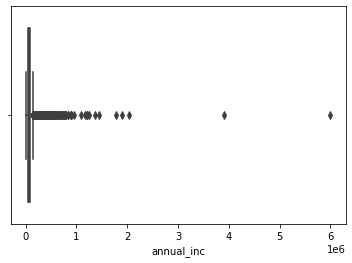

In [35]:
sns.boxplot(df['annual_inc'])

In [36]:
print('Lower Quartile:', df['annual_inc'].quantile(0.25))
print('Upper Quartile:', df['annual_inc'].quantile(0.75))
IQR = df['annual_inc'].quantile(0.75) - df['annual_inc'].quantile(0.25)
print('IQR:', IQR)
print('Median:', df['annual_inc'].quantile(0.5))
print(df['annual_inc'].quantile(0.5)-(1.5*IQR), df['annual_inc'].quantile(0.5)+(1.5*IQR))

Lower Quartile: 41000.0
Upper Quartile: 83000.0
IQR: 42000.0
Median: 60000.0
-3000.0 123000.0


<AxesSubplot:xlabel='annual_inc'>

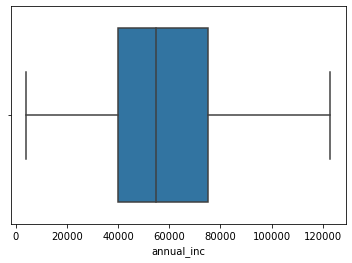

In [37]:
#Let's remove the records outside the Median-1.5IQR and Median+1.5IQR
df = df[(df['annual_inc']<123000.0) & (df['annual_inc']>-3000.0)]
sns.boxplot(df['annual_inc'])

<AxesSubplot:xlabel='delinq_2yrs'>

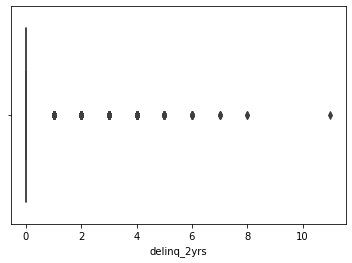

In [38]:
sns.boxplot(df['delinq_2yrs'])

In [39]:
print('Lower Quartile:', df['delinq_2yrs'].quantile(0.25))
print('Upper Quartile:', df['delinq_2yrs'].quantile(0.75))
IQR = df['delinq_2yrs'].quantile(0.75) - df['delinq_2yrs'].quantile(0.25)
print('IQR:', IQR)
print('Median:', df['delinq_2yrs'].quantile(0.5))
print(df['delinq_2yrs'].quantile(0.5)-(1.5*IQR), df['delinq_2yrs'].quantile(0.5)+(1.5*IQR))

Lower Quartile: 0.0
Upper Quartile: 0.0
IQR: 0.0
Median: 0.0
0.0 0.0


In [40]:
#Let's remove the records outside the Median-1.5IQR and Median+1.5IQR
df['delinq_2yrs'].value_counts()

0     30807
1      2846
2       575
3       189
4        51
5        17
6        10
7         4
8         2
11        1
Name: delinq_2yrs, dtype: int64

<AxesSubplot:xlabel='inq_last_6mths'>

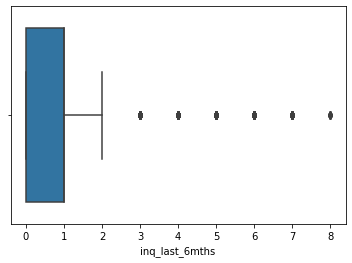

In [41]:
sns.boxplot(df['inq_last_6mths'])

In [42]:
df['inq_last_6mths'].value_counts()

0    16795
1     9566
2     5035
3     2631
4      261
5      126
6       48
7       30
8       10
Name: inq_last_6mths, dtype: int64

<AxesSubplot:xlabel='open_acc'>

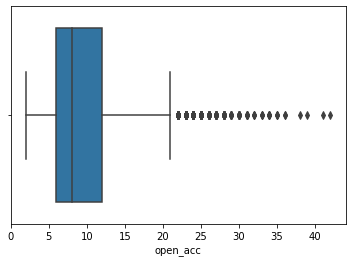

In [43]:
sns.boxplot(df['open_acc'])

In [44]:
print('Lower Quartile:', df['open_acc'].quantile(0.25))
print('Upper Quartile:', df['open_acc'].quantile(0.75))
IQR = df['open_acc'].quantile(0.75) - df['open_acc'].quantile(0.25)
print('IQR:', IQR)
print('Median:', df['open_acc'].quantile(0.5))
print(df['open_acc'].quantile(0.5)-(1.5*IQR), df['open_acc'].quantile(0.5)+(1.5*IQR))

Lower Quartile: 6.0
Upper Quartile: 12.0
IQR: 6.0
Median: 8.0
-1.0 17.0


<AxesSubplot:xlabel='revol_bal'>

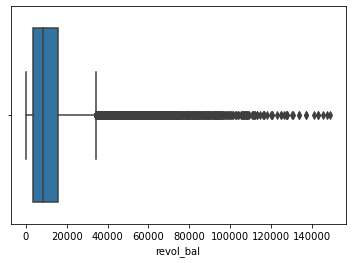

In [45]:
sns.boxplot(df['revol_bal'])

In [46]:
print('Lower Quartile:', df['revol_bal'].quantile(0.25))
print('Upper Quartile:', df['revol_bal'].quantile(0.75))
IQR = df['revol_bal'].quantile(0.75) - df['revol_bal'].quantile(0.25)
print('IQR:', IQR)
print('Median:', df['revol_bal'].quantile(0.5))
print(df['revol_bal'].quantile(0.5)-(1.5*IQR), df['revol_bal'].quantile(0.5)+(1.5*IQR))

Lower Quartile: 3509.25
Upper Quartile: 15817.0
IQR: 12307.75
Median: 8396.0
-10065.625 26857.625


In [47]:
df[df['revol_bal'] > 26857.625]['loan_status'].value_counts()

Fully Paid     2683
Charged Off     520
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='last_pymnt_amnt'>

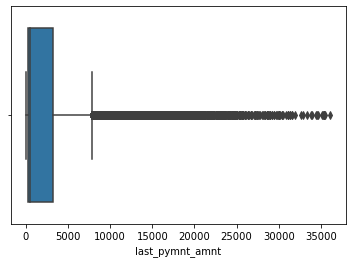

In [48]:
sns.boxplot(df['last_pymnt_amnt'])

In [49]:
print('Lower Quartile:', df['last_pymnt_amnt'].quantile(0.25))
print('Upper Quartile:', df['last_pymnt_amnt'].quantile(0.75))
IQR = df['last_pymnt_amnt'].quantile(0.75) - df['last_pymnt_amnt'].quantile(0.25)
print('IQR:', IQR)
print('Median:', df['last_pymnt_amnt'].quantile(0.5))
print(df['last_pymnt_amnt'].quantile(0.5)-(1.5*IQR), df['last_pymnt_amnt'].quantile(0.5)+(1.5*IQR))

Lower Quartile: 212.41
Upper Quartile: 3262.5874999999996
IQR: 3050.1775
Median: 540.215
-4035.0512499999995 5115.48125


In [50]:
df[df['last_pymnt_amnt'] > 5115.48125]['loan_status'].value_counts()

Fully Paid     5919
Charged Off      11
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='last_pymnt_amnt'>

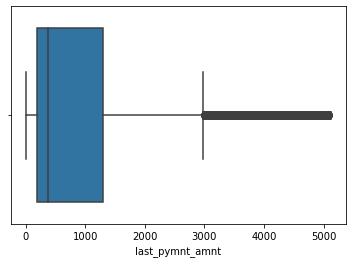

In [51]:
#Remove last_pymnt_amnt greater than 5115.48125
df = df[df['last_pymnt_amnt'] < 5115.48125]
sns.boxplot(df['last_pymnt_amnt'])

### Univariate Analysis

In [77]:
df.head().iloc[:, 18:]

,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1985-01-01,1,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1999-04-01,5,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,2001-11-01,2,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1996-02-01,1,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
5,2004-11-01,3,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

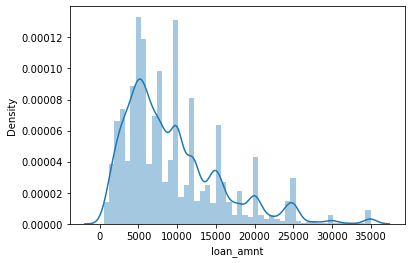

In [53]:
#Loan Amount
sns.distplot(df['loan_amnt'])

<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

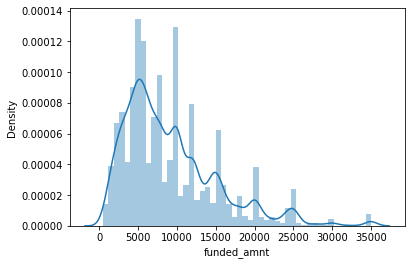

In [54]:
#Funded Loan Amount
sns.distplot(df['funded_amnt'])

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Density'>

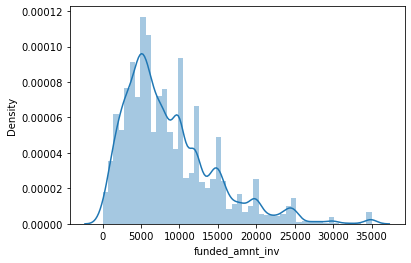

In [55]:
#Investor Funded Loan Amount
sns.distplot(df['funded_amnt_inv'])

Mostly people apply for loan for 4000 to 7000 and we can see spikes at 5000, 10000, 15000, 20000 and so on. So mostly people prefer to go for such kind of amounts.

<AxesSubplot:xlabel='term', ylabel='count'>

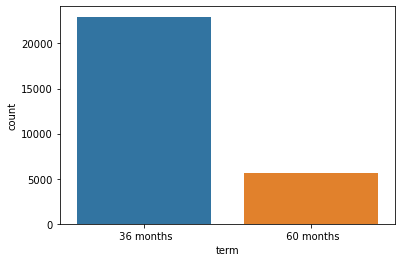

In [56]:
sns.countplot(data=df, x='term')

Mostly people go for 36 months plan than 60 months plan. People are interested in short term loan than long term loan

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

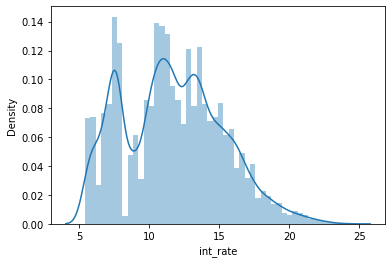

In [57]:
sns.distplot(df['int_rate'])

Mostly interest rate is between 10% to 15%. But there is also spike between 6% to 8% interest rate

<AxesSubplot:xlabel='installment', ylabel='Density'>

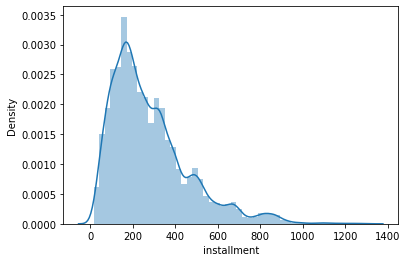

In [58]:
sns.distplot(df['installment'])

Most installments are between 100 and 300

<AxesSubplot:xlabel='grade', ylabel='count'>

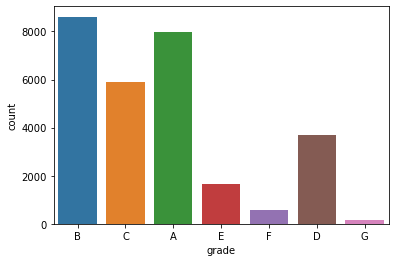

In [59]:
sns.countplot(data=df, x='grade')

Most of the borrower have grade B and A

<AxesSubplot:xlabel='emp_length', ylabel='count'>

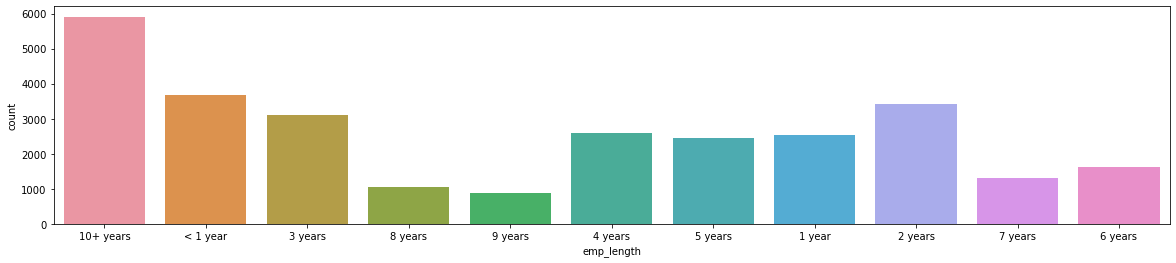

In [60]:
plt.figure(figsize=(20,4))
sns.countplot(data=df, x='emp_length')

Most of the borrowe have more than 10 years of experience

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

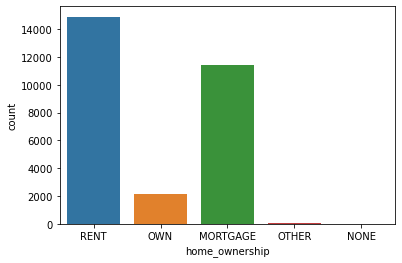

In [61]:
sns.countplot(data=df, x='home_ownership')

Mostly the people who are in rent or mortage require loan than others

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

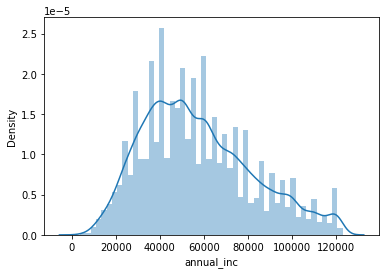

In [62]:
sns.distplot(df['annual_inc'])

People whose salary between 30000 and 60000 take loans

<AxesSubplot:xlabel='verification_status', ylabel='count'>

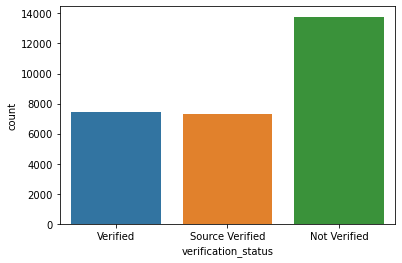

In [63]:
sns.countplot(data=df, x='verification_status')

Most of the borrowers are not verified

<AxesSubplot:xlabel='issue_d', ylabel='count'>

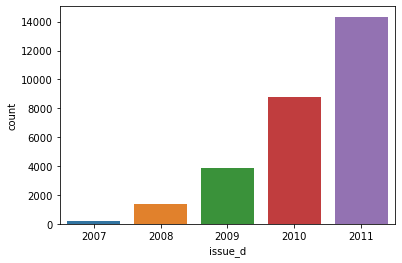

In [64]:
sns.countplot(df.issue_d.dt.year)

Issuing loans are increased by 2x every year

<AxesSubplot:xlabel='loan_status', ylabel='count'>

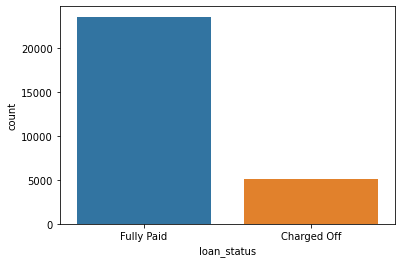

In [65]:
sns.countplot(data=df, x='loan_status')

<AxesSubplot:xlabel='count', ylabel='purpose'>

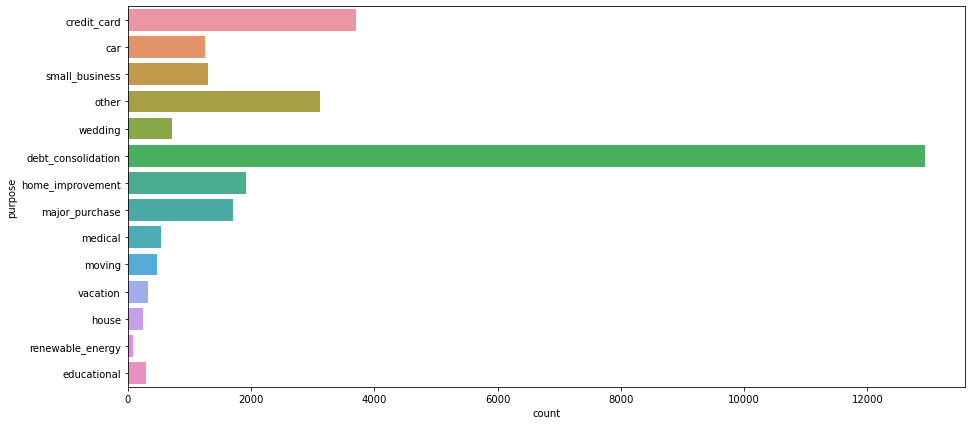

In [66]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, y='purpose')

Mostly people take loan for debt consolidation, credit card or for other usage

<AxesSubplot:xlabel='count', ylabel='addr_state'>

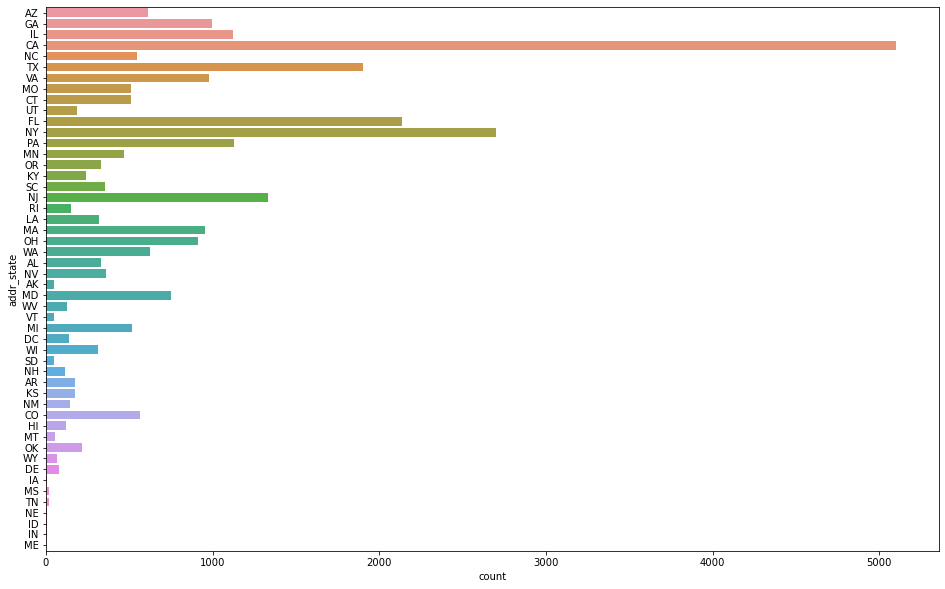

In [67]:
plt.figure(figsize=(16, 10))
sns.countplot(data=df, y='addr_state')

Most of the borrowers are from Callifornia, New York, Florida and Texas

<AxesSubplot:xlabel='dti', ylabel='Density'>

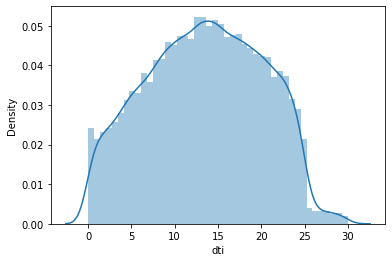

In [68]:
sns.distplot(df['dti'])

<AxesSubplot:xlabel='delinq_2yrs', ylabel='Density'>

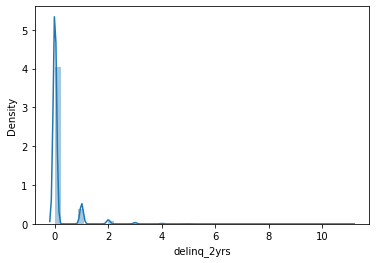

In [69]:
sns.distplot(df['delinq_2yrs'])

<AxesSubplot:xlabel='count', ylabel='earliest_cr_line'>

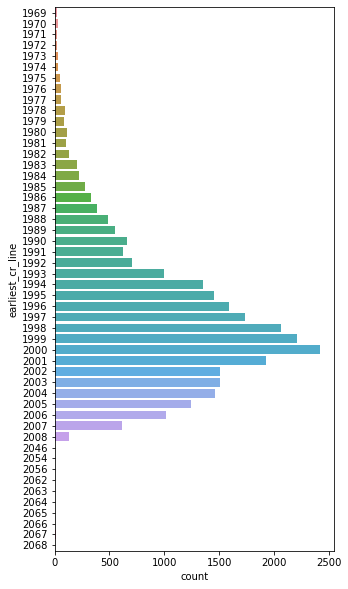

In [76]:
plt.figure(figsize=(5,10))
sns.countplot(y=df.earliest_cr_line.dt.year)

The opening of credit line increased till the year of 2000 and then it started to decrease

<AxesSubplot:xlabel='inq_last_6mths', ylabel='Density'>

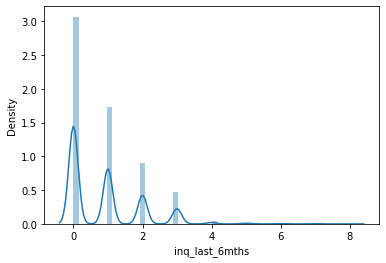

In [80]:
#No of enquries in last 6 months
sns.distplot(df['inq_last_6mths'])

<AxesSubplot:xlabel='open_acc', ylabel='Density'>

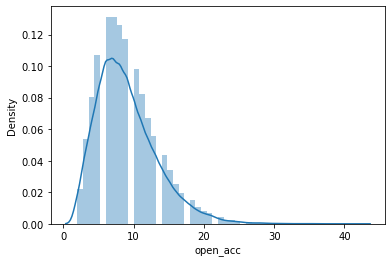

In [82]:
#The number of open credit lines in the borrower's credit file.
sns.distplot(df['open_acc'])

Mostly borrowers have 5 to 10 open credit lines

<AxesSubplot:xlabel='pub_rec', ylabel='Density'>

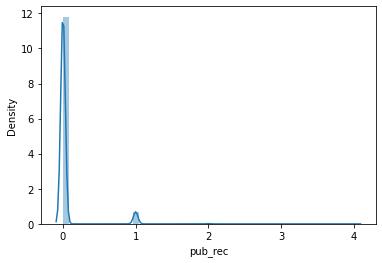

In [84]:
#Number of derogatory public records
sns.distplot(df['pub_rec'])

<AxesSubplot:xlabel='revol_bal', ylabel='Density'>

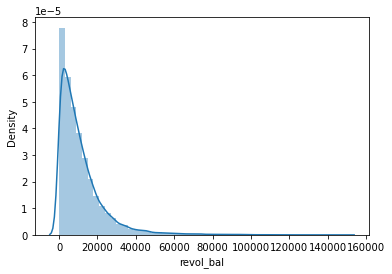

In [86]:
#Total credit revolving balance
sns.distplot(df['revol_bal'])

Mostly revolving balances are below 20000

<AxesSubplot:xlabel='total_acc', ylabel='Density'>

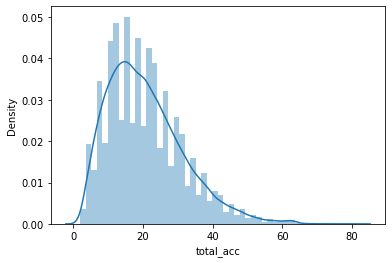

In [93]:
#The total number of credit lines currently in the borrower's credit file
sns.distplot(df['total_acc'])

Most of the customers have 10 to 25 credit lines

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Density'>

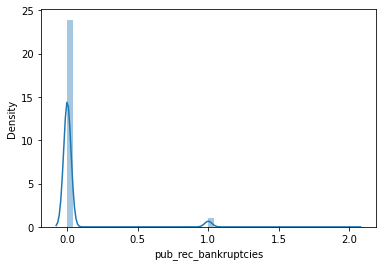

In [95]:
sns.distplot(df['pub_rec_bankruptcies'])

### Bivariate Analysis

In [104]:
df['loan_status_derived'] = df['loan_status'].apply(lambda x:1 if x == 'Charged Off' else 0)

<AxesSubplot:>

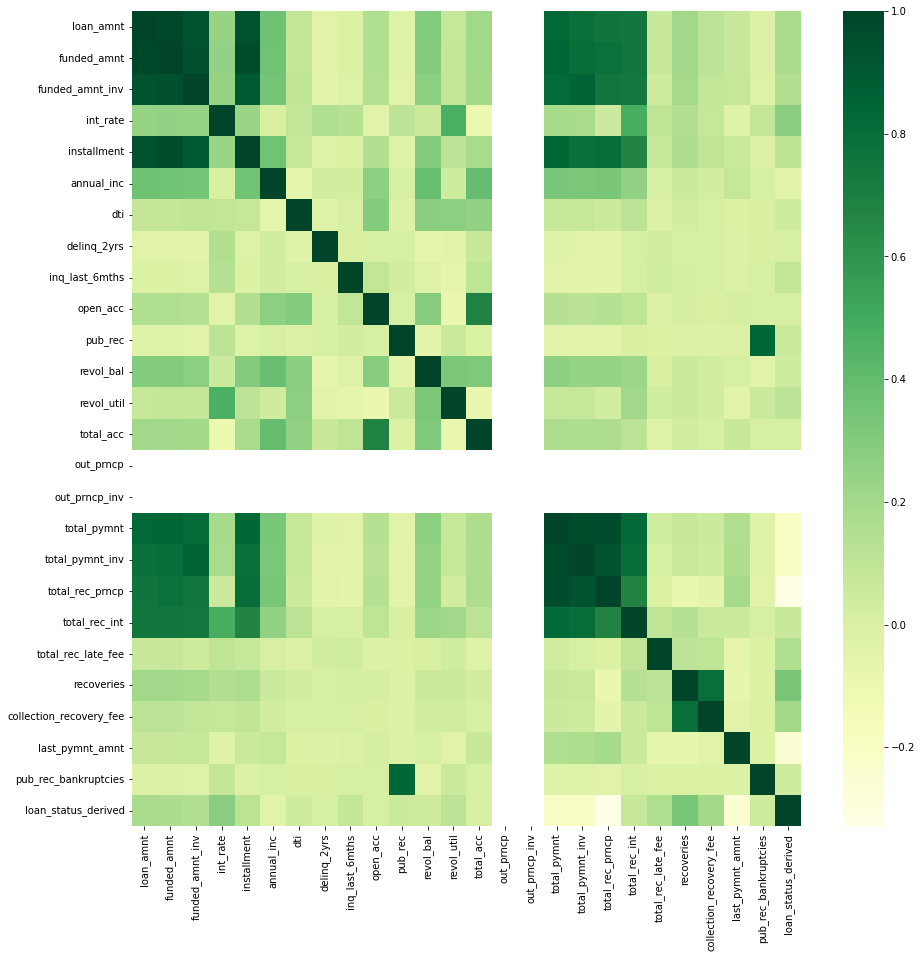

In [109]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='YlGn')

In [218]:
df.head().iloc[:, 27:]

,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_status_derived,issue_year
0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,0,2011
1,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,1,2011
2,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,0,2011
3,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,0,2011
5,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,0,2011


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

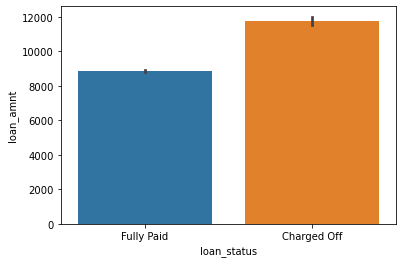

In [115]:
sns.barplot(data=df, x='loan_status', y='loan_amnt')

We can see non default customers have comparatively low loan amount than defaulters

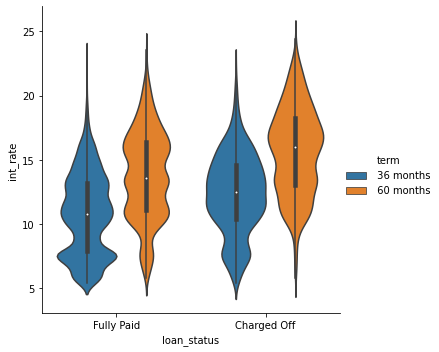

In [131]:
sns.catplot(data=df, x='loan_status', y='int_rate', hue='term', kind='violin')

It seems who have taken loan for 36 months with 13% interest (apprx.) and 60 months above 15% interest have higher chance of being default

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

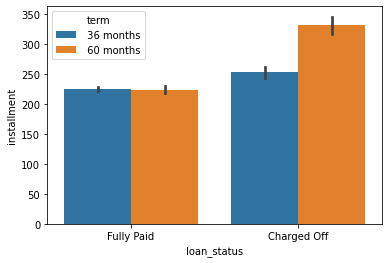

In [137]:
sns.barplot(data=df, x='loan_status', y='installment', hue='term', estimator=np.median)

Defaulters have more than avg 200 dollar monthly installments

In [141]:
df[df['loan_status'] == 'Charged Off']['grade'].value_counts()

B    1280
C    1233
D    1018
E     623
A     539
F     271
G      89
Name: grade, dtype: int64

In [146]:
df[df['loan_status'] == 'Fully Paid']['grade'].value_counts()

A    7433
B    7333
C    4661
D    2681
E    1046
F     294
G      71
Name: grade, dtype: int64

B, C and D loan grade have higher chance of being default

In [148]:
df[df['loan_status'] == 'Charged Off']['emp_length'].value_counts()

10+ years    1228
< 1 year      604
2 years       535
3 years       528
1 year        436
4 years       433
5 years       426
6 years       288
7 years       246
8 years       183
9 years       146
Name: emp_length, dtype: int64

In [150]:
df[df['loan_status'] == 'Fully Paid']['emp_length'].value_counts()

10+ years    4681
< 1 year     3061
2 years      2892
3 years      2584
4 years      2156
1 year       2107
5 years      2019
6 years      1343
7 years      1058
8 years       882
9 years       736
Name: emp_length, dtype: int64

No relation found in employee experience and being default 

In [158]:
df[df['loan_status'] == 'Charged Off'].groupby('home_ownership')['loan_status'].count()

home_ownership
MORTGAGE    2017
OTHER         17
OWN          381
RENT        2638
Name: loan_status, dtype: int64

In [160]:
df[df['loan_status'] == 'Fully Paid'].groupby('home_ownership')['loan_status'].count()

home_ownership
MORTGAGE     9432
NONE            3
OTHER          65
OWN          1767
RENT        12252
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

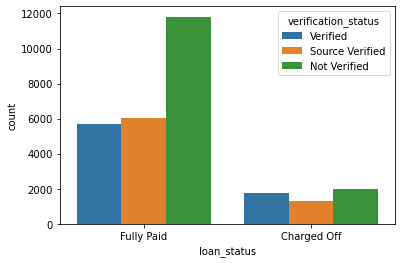

In [173]:
sns.countplot(data=d, x='loan_status', hue='verification_status')

Most of defaulters are not verified

<AxesSubplot:xlabel='loan_status', ylabel='delinq_2yrs'>

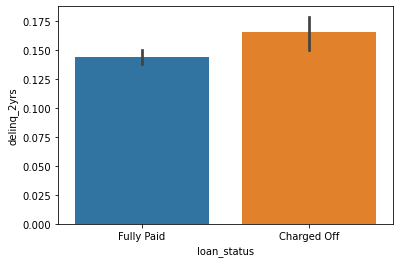

In [201]:
sns.barplot(data=df, x='loan_status', y='delinq_2yrs', estimator=np.mean)

<AxesSubplot:xlabel='loan_status', ylabel='inq_last_6mths'>

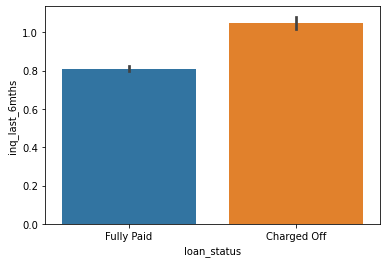

In [204]:
sns.barplot(data=df, x='loan_status', y='inq_last_6mths', estimator=np.mean)

Increase in no of enquiries can lead to default

<AxesSubplot:xlabel='loan_status', ylabel='open_acc'>

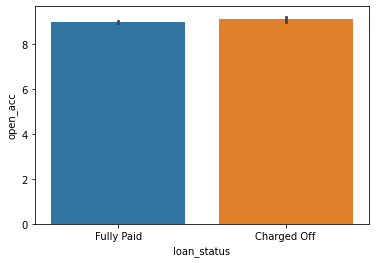

In [206]:
sns.barplot(data=df, x='loan_status', y='open_acc', estimator=np.mean)

<AxesSubplot:xlabel='loan_status', ylabel='pub_rec'>

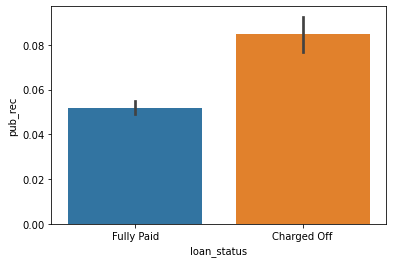

In [208]:
sns.barplot(data=df, x='loan_status', y='pub_rec', estimator=np.mean)

Dafaulters have higher number of derogatory public records

<AxesSubplot:xlabel='loan_status', ylabel='revol_bal'>

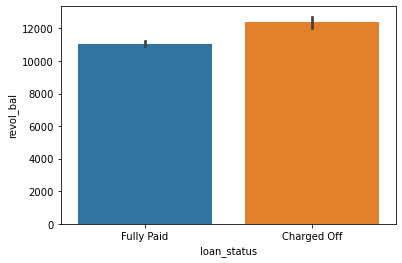

In [210]:
sns.barplot(data=df, x='loan_status', y='revol_bal', estimator=np.mean)

It's obvious that dafaulters will have higher revolving balance

<AxesSubplot:xlabel='loan_status', ylabel='revol_util'>

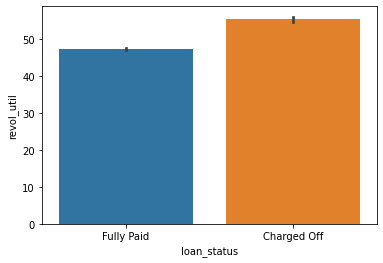

In [212]:
sns.barplot(data=df, x='loan_status', y='revol_util', estimator=np.mean)

Defaulters have higher utilization rate

<AxesSubplot:xlabel='loan_status', ylabel='pub_rec_bankruptcies'>

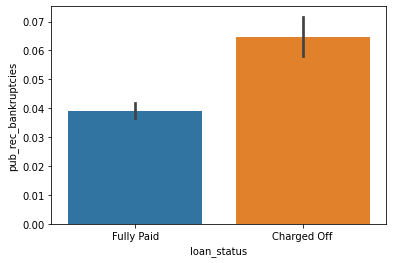

In [221]:
sns.barplot(data=df, x='loan_status', y='pub_rec_bankruptcies', estimator=np.mean)

Dafaulters have the most bank rupts files